<a href="https://colab.research.google.com/github/rahulovi001/project-02/blob/main/Lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

<Axes: >

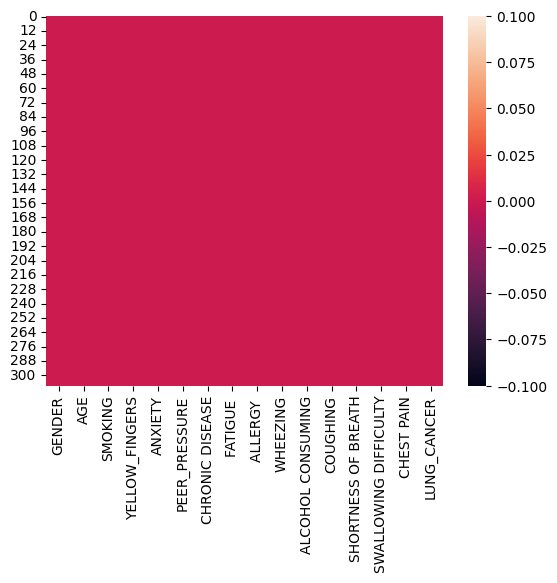

In [ ]:
sns.heatmap(df.isnull() ,cbar=True)

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


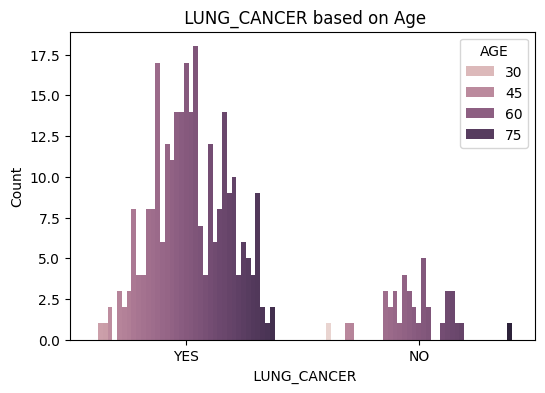

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='LUNG_CANCER', hue='AGE', data=df)
plt.title(' LUNG_CANCER based on Age')
plt.xlabel(' LUNG_CANCER')
plt.ylabel('Count')
plt.show()

In [ ]:
dict= {"column_names":[],"nuniqe":[],"dtypes":[]}
for col in df:
  dict["column_names"].append(col)
  dict["nuniqe"].append(df[col].nunique())
  dict["dtypes"].append(df[col].dtypes)

catvalue=pd.DataFrame(dict)
catvalue

,column_names,nuniqe,dtypes
0,GENDER,2,object
1,AGE,39,int64
2,SMOKING,2,int64
3,YELLOW_FINGERS,2,int64
4,ANXIETY,2,int64
5,PEER_PRESSURE,2,int64
6,CHRONIC DISEASE,2,int64
7,FATIGUE,2,int64
8,ALLERGY,2,int64
9,WHEEZING,2,int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

In [ ]:
categorical_cols = [col for col in df.columns
                    if not np.issubdtype(df[col].dtype, np.number) and col != 'LUNG_CANCER']

for col in categorical_cols:
    encoded = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]))
    df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0.0,1.0
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0.0,1.0
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1.0,0.0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0.0,1.0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1.0,0.0


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'GENDER_F',
       'GENDER_M'],
      dtype='object')

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df["LUNG_CANCER"]= LabelEncoder().fit_transform(df["LUNG_CANCER"])
df["LUNG_CANCER"]

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


In [ ]:
df['LUNG_CANCER'].value_counts()

In [ ]:
df.info()

In [ ]:
len(categorical_cols)

In [ ]:
df.drop(categorical_cols, axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df.isna().sum().sum()

In [ ]:
df.info()

In [ ]:
X = df.drop('LUNG_CANCER', axis=1)
Y = df['LUNG_CANCER']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(xtrain,Ytrain)

In [ ]:
predictions=model.predict(xtest)
predictions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Ytest, predictions))